In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score, mean_squared_error, confusion_matrix

In [2]:
data = pd.read_csv('../../data/breastCancer.csv')
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.columns

Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [4]:
data.corr()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
clump_thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
size_uniformity,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
shape_uniformity,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
epithelial_size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [5]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [6]:
data['bare_nucleoli'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [7]:
data = data[data['bare_nucleoli']!='?']
data['bare_nucleoli'] = data['bare_nucleoli'].astype(int)

In [8]:
data.drop(['mitoses', 'id'], axis=1, inplace=True)
data

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,class
0,5,1,1,1,2,1,3,1,2
1,5,4,4,5,7,10,3,2,2
2,3,1,1,1,2,2,3,1,2
3,6,8,8,1,3,4,3,7,2
4,4,1,1,3,2,1,3,1,2
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,2
695,2,1,1,1,2,1,1,1,2
696,5,10,10,3,7,3,8,10,4
697,4,8,6,4,3,4,10,6,4


In [9]:
df_x = data[['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli']] 

df_y = data["class"]

In [10]:
########################### splitting data into train and test ###############################
Xtrain, Xtest, ytrain, ytest = train_test_split(df_x.values, df_y.values,random_state=1)
model = LogisticRegression(fit_intercept = True)
model.fit(Xtrain,ytrain)
pred_y = model.predict(Xtest)
acc = accuracy_score(ytest, pred_y)


In [11]:
print("accuracy of the model: "+ str(acc))
print("score of the cross validation: " + str(cross_val_score(model,df_x,df_y, cv=10).mean()))
print("Matrix of confusion: \n" + str(confusion_matrix(ytest, pred_y)))

accuracy of the model: 0.9824561403508771
score of the cross validation: 0.9664322250639387
Matrix of confusion: 
[[111   0]
 [  3  57]]


In [37]:
Xtrain.shape

(512, 8)

In [34]:
def plot_learning_curve(               # función para imprimir el accuracy del modelo en una gráfica
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    #print(len(train_scores), len(test_scores), train_scores, test_scores)
    print(train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Plot learning curve
    plt.grid()
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")
    plt.title(title)

[ 63 207 350 493 637]


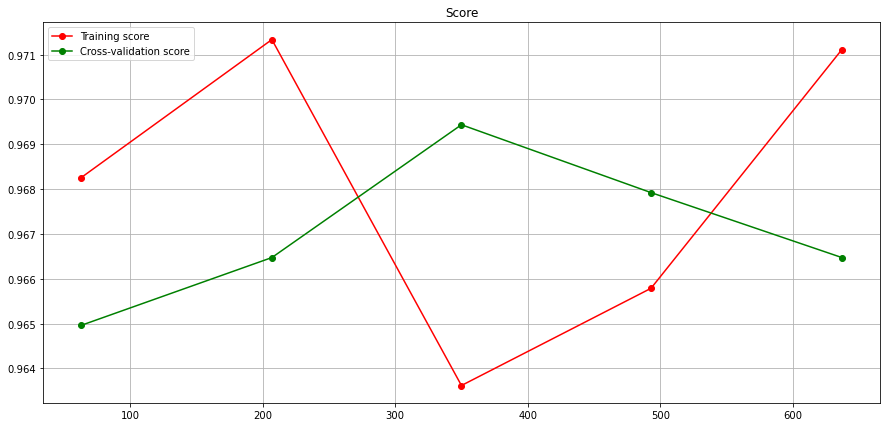

In [35]:
######################## graficar el accuracy #################
fig, axes = plt.subplots(1, 1, figsize=(15, 7))
title = r"Score"
estimator = model
plot_learning_curve(
    estimator, title, df_x, df_y, ylim=(0.7, 1.01), cv=15, n_jobs=4 
)
plt.show()